<a href="https://colab.research.google.com/github/inixrust/datasets/blob/main/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression Problem

### Exploratory Data Analysis

In [1]:
!wget --no-check-certificate https://github.com/lukpras/datasets/raw/main/student-test-score.csv

--2024-09-04 02:17:13--  https://github.com/lukpras/datasets/raw/main/student-test-score.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/lukpras/datasets/main/student-test-score.csv [following]
--2024-09-04 02:17:13--  https://media.githubusercontent.com/media/lukpras/datasets/main/student-test-score.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6061 (5.9K) [text/plain]
Saving to: ‘student-test-score.csv’

student-test-score. 100%[===================>]   5.92K  --.-KB/s    in 0s      

2024-09-04 02:17:13 (51.9 MB/s) - ‘student-test-score.csv’ saved [6061/6061]



In [2]:
import pandas as pd
import os

In [3]:
os.getcwd()

'/content'

In [4]:
os.listdir('/content/sample_data')

['anscombe.json',
 'README.md',
 'mnist_test.csv',
 'mnist_train_small.csv',
 'california_housing_train.csv',
 'california_housing_test.csv']

In [5]:
df = pd.read_csv('student-test-score.csv')

In [6]:
df.head()

,Pysics,Science,Statistics,Math
0,50.0,32,60.0,68
1,76.0,39,69.0,67
2,52.0,38,56.0,57
3,NaN,50,NaN,91
4,80.0,63,91.0,82


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pysics      447 non-null    float64
 1   Science     465 non-null    object 
 2   Statistics  461 non-null    float64
 3   Math        466 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 14.7+ KB


In [8]:
df.Science.sort_values()

,Science
441,10
290,10
265,100
323,103
163,11
...,...
246,99
233,Bandung
13,Diana
94,Mirana


In [11]:
# ekstrak nilai numerik pada kolom Science
science = df['Science'].str.extract(r"(\D+)|(\d+)$")
science.rename(columns={0:'String', 1:'Numerik'}, inplace=True)
science_s = science['String'].dropna().to_frame().reset_index()
science_s

,index,String
0,13,Diana
1,94,Mirana
2,233,Bandung
3,320,.


In [12]:
# Save ke dalam CSV
science_s.to_csv("nilai string dalam kolom Science.csv")

In [13]:
# nilai numerik pada kolom Science
science_n = science['Numerik'].dropna().to_frame().reset_index()
science_n.tail(2)

,index,Numerik
459,464,34
460,465,30


In [14]:
# Melihat jumlah entitas pada kolom Science
print("Nilai numerik ", len(science_n))
print("Nilai string ", len(science_s))
print("Nilai null ", df.Science.isnull().sum())

Nilai numerik  461
Nilai string  4
Nilai null  1


### Data Cleansing and Visualization

In [15]:
# Merubah nilai string menjadi nilai null/ #NA/ NaN
df['Science'] = pd.to_numeric(df['Science'], errors='coerce')
df.Science.dtype

dtype('float64')

In [16]:
# cek nilai null
df.isnull().sum()

,0
Pysics,19
Science,4
Statistics,5
Math,0


In [17]:
# Mengisi nilai null pada setiap kolom dengan nilai rata2
df['Pysics'] = df['Pysics'].fillna(df['Pysics'].mean())
df['Statistics'] = df['Statistics'].fillna(df['Statistics'].mean())
df['Science'] = df['Science'].fillna(df['Science'].mean())

In [18]:
df.isnull().sum()

,0
Pysics,0
Science,0
Statistics,0
Math,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pysics      466 non-null    float64
 1   Science     466 non-null    float64
 2   Statistics  466 non-null    float64
 3   Math        466 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 14.7 KB


In [20]:
# Merubah tipe data dari float/desimal menjadi integer
df['Pysics'] = df['Pysics'].astype(int)
df['Statistics'] = df['Statistics'].astype(int)
df['Science'] = df['Science'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Pysics      466 non-null    int64
 1   Science     466 non-null    int64
 2   Statistics  466 non-null    int64
 3   Math        466 non-null    int64
dtypes: int64(4)
memory usage: 14.7 KB


In [21]:
# cek nilai statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pysics,466.0,70.210300,13.349511,13.0,61.0,70.0,80.0,99.0
Science,466.0,65.293991,22.728729,3.0,48.0,70.0,84.0,103.0
Statistics,466.0,74.253219,13.278175,14.0,65.0,74.0,83.0,107.0
Math,466.0,74.540773,11.424528,22.0,67.0,74.0,83.0,99.0


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

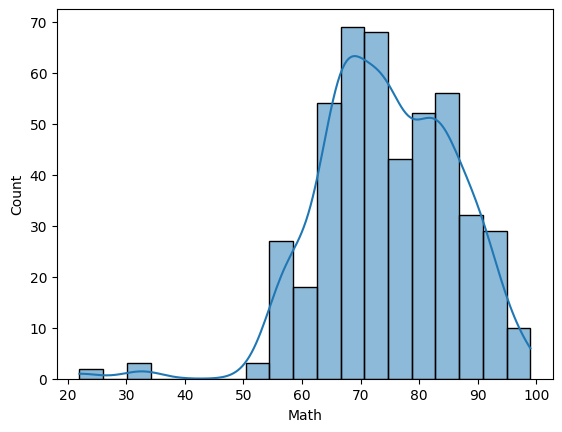

In [23]:
fig = sns.histplot(data=df, x='Math', kde=True).get_figure()
plt.savefig("histogram math.png")